In [7]:
!python --version

Python 3.8.5


In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

import scanpy as sc

In [2]:
adata = sc.read('brain_downsampled5000_integrated.h5ad')
groups = adata.obs.groupby('dataset').indices
RO = adata[groups['Rosenberg']]
X = pd.DataFrame(data = RO.X, index = RO.obs_names, columns=RO.var_names)
Y = pd.DataFrame(data = RO.obs['original'].values)[0]
print("shape of data: ", X.shape)
print("shape of labels: ", Y.shape)

shape of data:  (76321, 2000)
shape of labels:  (76321,)


In [3]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(76321, 72)
shape of train set:  (61056, 2000)  and labels:  (61056, 72) 

shape of test set:  (15265, 2000)  and labels:  (15265, 72) 

Shape of train and validation set to check for overfitting
shape of train set:  (54950, 2000)  and labels:  (54950, 72) 

shape of validation set:  (6106, 2000)  and labels:  (6106, 72)


## Linear SVM performance

shape of labels in training set:  (61056,)
shape of labels in test set:  (15265,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 1512.7020480632782
Predict time: 1.0130829811096191
Accuracy of test set:  0.7314117261709794
F1-score of test set:  0.7320911669387413
Precision of test set: 0.736405286702579
Recall of test set: 0.7314117261709794
Classification report of test set:
                                            precision    recall  f1-score   support

       1 OB Mitral/Tufted Eomes-Rosenberg       0.33      0.39      0.36        23
              10 CTX PyrL4 Rorb-Rosenberg       0.57      0.63      0.60       155
                11 CTX PyrL4/L5-Rosenberg       0.69      0.72      0.70       564
             12 CTX PyrL5 Itgb3-Rosenberg       0.63      0.65      0.64        40
             13 CTX PyrL5 Fezf2-Rosenberg       0.73      0.61      0.67        70
                  14 CTX PyrL6a-Rosenberg       0.63      0.71      0.67       326
          15 CTX PyrL5/L6 Sulf1-Rosenberg       0.71      0.66      0.68        99
           16 CTX PyrL5/L6 Npr3-Rosenberg       0.50      0.55      

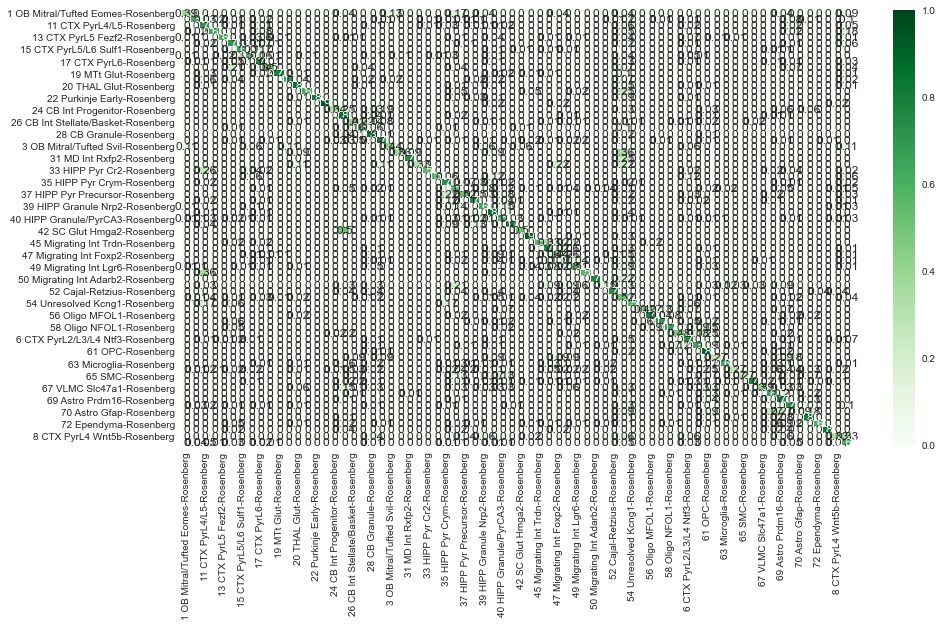

In [4]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


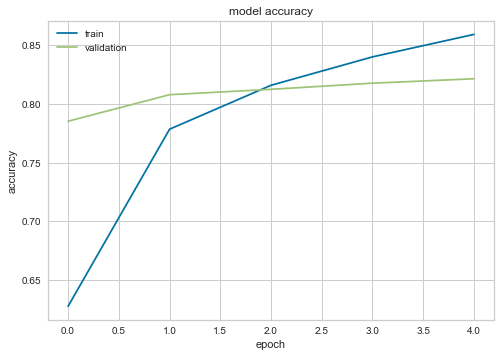

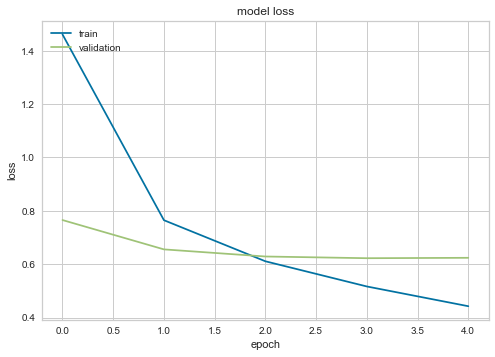

train the final model
Epoch 1/5
1908/1908 [==============================] - 21s 11ms/step - loss: 0.4071 - accuracy: 0.8715
Epoch 2/5
1908/1908 [==============================] - 16s 9ms/step - loss: 0.3643 - accuracy: 0.8831
Epoch 3/5
1908/1908 [==============================] - 17s 9ms/step - loss: 0.3224 - accuracy: 0.8948
Epoch 4/5
1908/1908 [==============================] - 17s 9ms/step - loss: 0.2881 - accuracy: 0.9061
Epoch 5/5
1908/1908 [==============================] - 17s 9ms/step - loss: 0.2489 - accuracy: 0.9175
Training time: 87.78372573852539
Predict time: 2.007720947265625
The results are as follows:
Accuracy of test set:  0.8307238781526367
F1-score of test set:  0.8292907554223071
Precision of test set: 0.8308013840321017
Recall of test set: 0.8307238781526367
Classification report of test set:
                                            precision    recall  f1-score   support

       1 OB Mitral/Tufted Eomes-Rosenberg       0.65      0.65      0.65        23
      

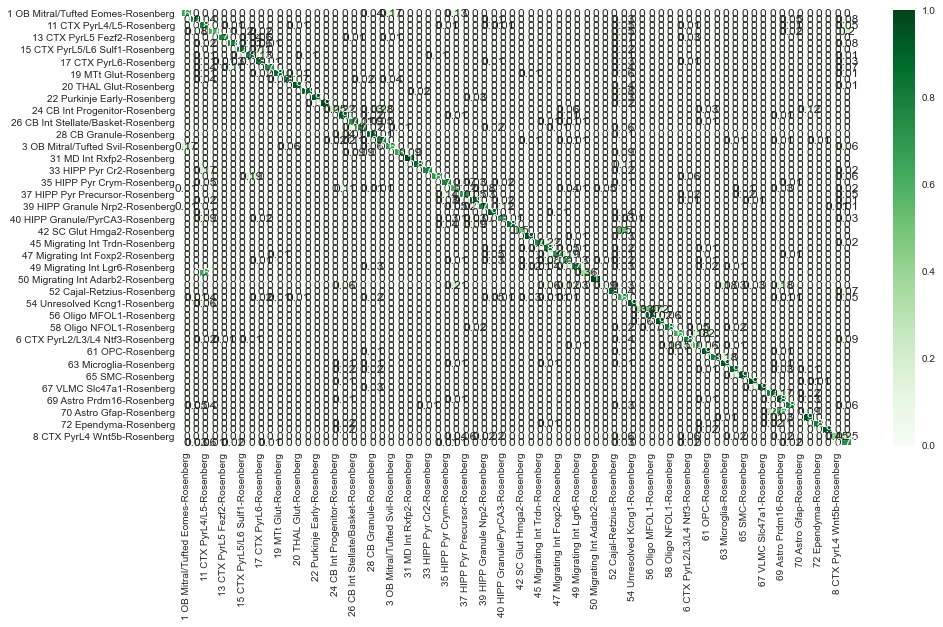

In [4]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## CNN performance

Train the model to check for overfitting


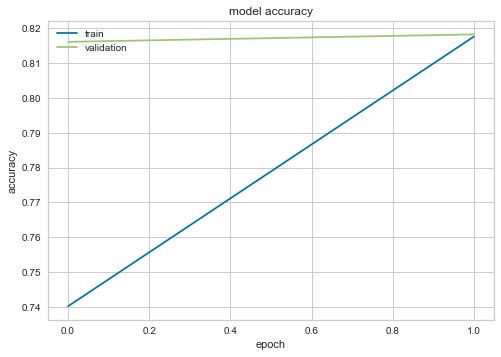

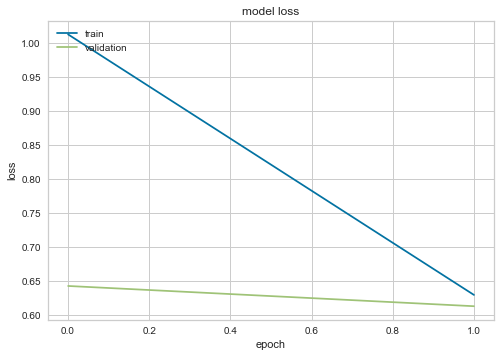

train the final model
Epoch 1/2
1908/1908 [==============================] - 362s 189ms/step - loss: 0.4862 - accuracy: 0.8544
Epoch 2/2
1908/1908 [==============================] - 325s 170ms/step - loss: 0.4036 - accuracy: 0.8738
Training time: 690.452446937561
Predict time: 15.590980052947998
The results are as follows:
Accuracy of test set:  0.8338028169014085
F1-score of test set:  0.8322684308813717


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of test set: 0.8339192297565771
Recall of test set: 0.8338028169014085


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of test set:
                                            precision    recall  f1-score   support

       1 OB Mitral/Tufted Eomes-Rosenberg       0.67      0.70      0.68        23
              10 CTX PyrL4 Rorb-Rosenberg       0.69      0.82      0.75       155
                11 CTX PyrL4/L5-Rosenberg       0.74      0.80      0.77       564
             12 CTX PyrL5 Itgb3-Rosenberg       0.82      0.70      0.76        40
             13 CTX PyrL5 Fezf2-Rosenberg       0.89      0.69      0.77        70
                  14 CTX PyrL6a-Rosenberg       0.80      0.85      0.82       326
          15 CTX PyrL5/L6 Sulf1-Rosenberg       0.76      0.82      0.79        99
           16 CTX PyrL5/L6 Npr3-Rosenberg       0.72      0.71      0.72       110
                   17 CTX PyrL6-Rosenberg       0.88      0.83      0.85       693
                    18 CLAU Pyr-Rosenberg       0.67      0.57      0.62        28
                    19 MTt Glut-Rosenberg       0.

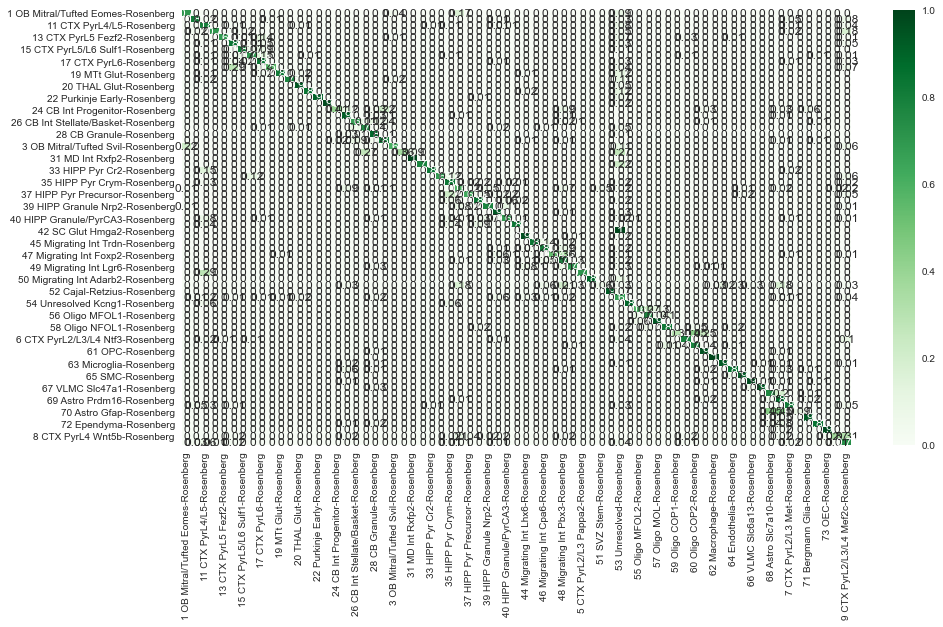

In [5]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)